<a href="https://colab.research.google.com/github/ImNotDanish05/2025_KC_TI-1A/blob/main/Airbnb%20-%20UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install danish05

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.2 MB/s eta 0:00:00


In [63]:
import numpy as np
import pandas as pd
import danish05
import matplotlib
import matplotlib.pyplot as plt
import os
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
drive.mount("/content/drive/")
dpath = "/content/drive/MyDrive/Danish05/File Belajar/Coding Fun/Data/Kecerdasan Buatan/UTS Semester 2"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Load Dataset

In [4]:
airbnb_csv = os.path.join(dpath, 'airbnb.csv')

### Check Data Info

In [5]:
df_airbnb = pd.read_csv(airbnb_csv) # Ini sudah dataframe
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Data types**

In [10]:
# Data type
df_airbnb.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [9]:
# Melihat banyak data yang masih ada NULL
df_airbnb.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [13]:
# Mengecek jumlah baris dan data
x, y = df_airbnb.shape
print(f"Jumlah data: {x}")
print(f"Jumlah baris: {y}")

Jumlah data: 48895
Jumlah baris: 16


In [61]:
df_airbnb[['price']].describe().round(2)

,price
count,48895.00
mean,152.72
std,240.15
min,0.00
25%,69.00
50%,106.00
75%,175.00
max,10000.00


In [23]:
# Mengecek kita punya room type apa saja
df_airbnb[['room_type']].groupby(['room_type']).count()

""
room_type
Entire home/apt
Private room
Shared room


In [60]:
result = df_airbnb[['room_type', 'price']].groupby(['room_type']).agg(
    Price_count=('price', 'count'),
    Price_mean=('price', 'mean'),
    Price_std=('price', 'std'),
    Price_min=('price', 'min'),
    Price_25=('price', lambda x: x.quantile(0.25)),
    Price_50=('price', 'median'),
    Price_75=('price', lambda x: x.quantile(0.75)),
    Price_max=('price', 'max'),
).round(2)

result['Perbandingan harga'] = (result['Price_min'] / result['Price_max']).round(2)
result.rename(columns={'Price_count': 'Banyak dipakai', 'Price_mean': 'Rata-rata harga', 'Price_min': 'Harga terendah', 'Price_max': 'Harga termahal'})


,Banyak dipakai,Rata-rata harga,Price_std,Harga terendah,Price_25,Price_50,Price_75,Harga termahal,Perbandingan harga
room_type,,,,,,,,,
Entire home/apt,25409,211.79,284.04,0,120.0,160.0,229.0,10000,0.0
Private room,22326,89.78,160.21,0,50.0,70.0,95.0,10000,0.0
Shared room,1160,70.13,101.73,0,33.0,45.0,75.0,1800,0.0


In [42]:
# Mengecek data mana yang gratis
df_airbnb[df_airbnb['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


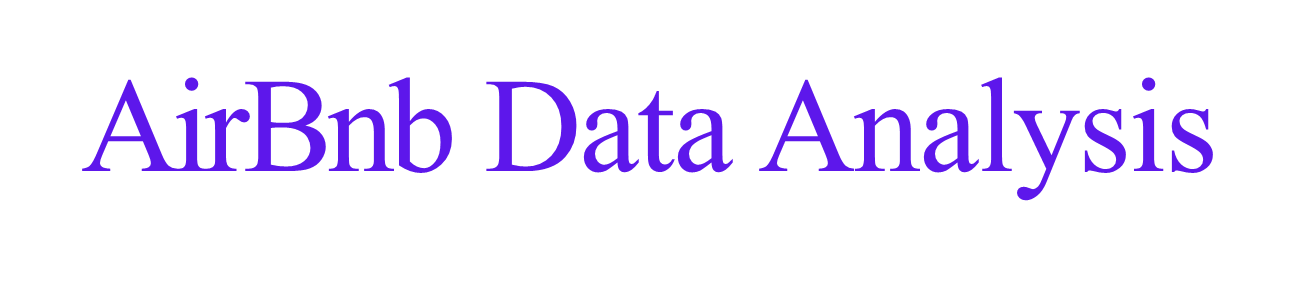

Pada UTS kali ini, kalian akan diminta mempraktekan :

Pandas : Read, Series, DataFrame, Manipulation, Plotting

Matplotlib : Ploting, Customization, Subplot, Diagram, Seaborn

Data Analysis & Manipulation

In [45]:
# 1. Read untuk CSV
df_airbnb = pd.read_csv(airbnb_csv) # Ini sudah dataframe
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [55]:
# 2. Series
# Buat mengecek isi data
se = pd.Series(df_airbnb['room_type'])
se.drop_duplicates()

,room_type
0,Private room
1,Entire home/apt
39,Shared room


In [81]:
# 3. DataFrame
count = df_airbnb['room_type'].value_counts()
checker = pd.DataFrame(
    count
)
checker.columns = ['count']

scaler = MinMaxScaler()
checker['scaled'] = scaler.fit_transform(checker[['count']])
checker.round(2)

,count,scaled
room_type,,
Entire home/apt,25409,1.00
Private room,22326,0.87
Shared room,1160,0.00
